In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_df = pd.read_csv("Using-Data-to-Bring-Customers/df_training_scholarjet.csv", index_col=0)
test_df = pd.read_csv("Using-Data-to-Bring-Customers/df_holdout_scholarjet.csv", index_col=0)

In [3]:
print("Train data shape",train_df.shape)
print("Test data shape",test_df.shape)

Train data shape (28126, 183)
Test data shape (30375, 181)


In [4]:
pd.options.display.max_rows = 250

In [5]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
cuid,28126.0,265872.713859,152691.063013,10.000000,134457.500000,264617.500000,398016.500000,5.321660e+05
convert_30,28126.0,0.104103,0.305399,0.000000,0.000000,0.000000,0.000000,1.000000e+00
revenue_30,28126.0,75.038997,508.874716,0.000000,0.000000,0.000000,0.000000,3.498669e+04
numorderone,9702.0,0.022367,0.153355,0.000000,0.000000,0.000000,0.000000,3.000000e+00
numorderthreeone,9702.0,0.037827,0.205360,0.000000,0.000000,0.000000,0.000000,4.000000e+00
numorderseventhree,9702.0,0.078231,0.298023,0.000000,0.000000,0.000000,0.000000,5.000000e+00
numorderthirtyseven,9702.0,0.336425,0.712727,0.000000,0.000000,0.000000,1.000000,1.600000e+01
numordersixtythirty,9702.0,0.337044,0.814508,0.000000,0.000000,0.000000,0.000000,1.800000e+01
numorderyearsixty,9702.0,1.323954,2.041241,0.000000,0.000000,1.000000,2.000000,5.700000e+01
sumrevone,9702.0,10.836336,116.215514,0.000000,0.000000,0.000000,0.000000,3.799450e+03


In [6]:
[print(train_df[col].value_counts() , '\n\n') for col in train_df.loc[:, 'roll_up':'enrollmentmethod']]

Unmanaged     14748
Onboarding     9986
Retention      3392
Name: roll_up, dtype: int64 


Enrolled       18199
Active          9918
In Progress        8
Unconfirmed        1
Name: currentstatus, dtype: int64 


Business    22748
Trade        5378
Name: companytypegroup, dtype: int64 


US    25799
CA     2327
Name: team, dtype: int64 


Internal Application        10888
Internal Customer Scrape     5849
Social - Paid                3203
External Application         3032
Search - Paid                2113
Affiliates                   1523
Other                         904
Referral                      300
Bulk Upload                   124
Email                         105
Display - Acquisition          27
Quotes                         20
Gateway                        19
Display - Retargeting          14
Self ID                         3
Partners                        2
Name: customersource, dtype: int64 


None         14849
Primary      10484
Purchaser     2747
Other           46
Na

[None, None, None, None, None, None, None, None, None, None]

### Data Cleaning

In [7]:
threshold = train_df.revenue_30.mean() + 3 * train_df.revenue_30.std()
percent_outliers = train_df[train_df.revenue_30 > threshold].shape[0] / train_df[train_df.revenue_30 < threshold].shape[0] * 100
print("Percent outliers: ", round(percent_outliers, 2))

Percent outliers:  1.13


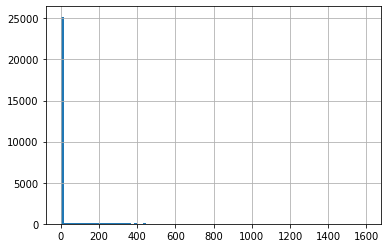

In [8]:
train_df[train_df.revenue_30 < threshold].revenue_30.hist(bins=100)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


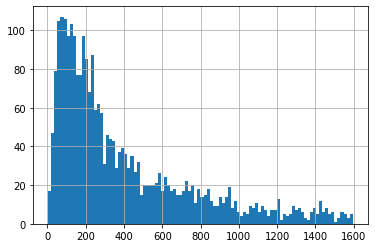

In [9]:
train_df[train_df.revenue_30 != 0][train_df.revenue_30 < threshold].revenue_30.hist(bins=100)

In [10]:
train_df.revenue_30.describe()

count    28126.000000
mean        75.038997
std        508.874716
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      34986.689900
Name: revenue_30, dtype: float64

In [11]:
train_df.num_purchases_year.describe()

count     28126
unique        6
top        None
freq      21680
Name: num_purchases_year, dtype: object

In [12]:
train_df.cost_purchases_year.describe()

count     28126
unique        6
top        None
freq      21991
Name: cost_purchases_year, dtype: object

In [13]:
train_df.companytypegroup.describe()

count        28126
unique           2
top       Business
freq         22748
Name: companytypegroup, dtype: object